In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import joblib


In [2]:
MODEL_PATH = "models/rf_dose_regressor_prod.joblib"
FEATURES_JSON = "models/rf_dose_features_prod.json"

In [3]:
with open(FEATURES_JSON, 'r') as f:
    obj = json.load(f)
features = obj['features'] if isinstance(obj, dict) else obj

In [4]:
model = joblib.load(MODEL_PATH)

In [5]:
imp = pd.DataFrame({
    'feature': features,
    'importance': model.feature_importances_
    }).sort_values(by='importance', ascending=False).head(10)

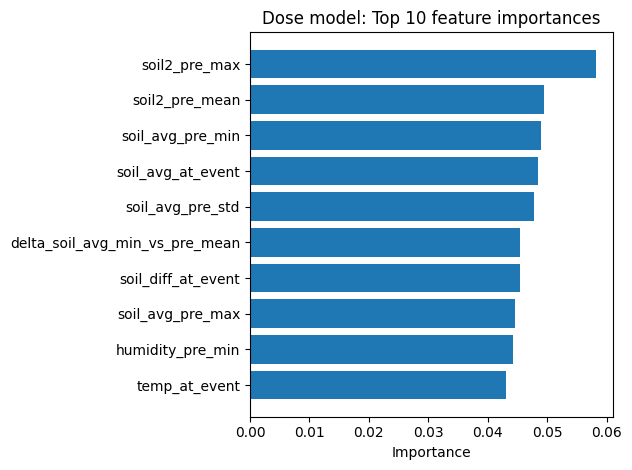

In [7]:
plt.figure()
plt.barh(imp["feature"][::-1], imp["importance"][::-1])
plt.xlabel("Importance")
plt.title("Dose model: Top 10 feature importances")
plt.tight_layout()

In [8]:
plt.savefig("docs/figures/dose_model_feature_importances.png", dpi=300)
plt.show()

<Figure size 640x480 with 0 Axes>